<a href="https://colab.research.google.com/github/Inodb14/DATA-Analysis-with-python/blob/main/_SIMPORE__Inoussa_92301474022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIMPORE INOUSSA 92301474022
MBA.BA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
url = "https://drive.google.com/uc?id=10NNKAV4mo8-FsVw-9IijrhqaaNSrwqhW"  # Lien partagé
df = pd.read_csv(url)

In [ ]:
df.head(5)

,Ad_Spend,Discount_Rate,Customer_Reviews,Competitor_Presence,Store_Location_Suburban,Store_Location_Urban,Seasonality_Low,Seasonality_Medium,Sales
0,16795,2.402946,2,0,True,False,False,False,51862.398887
1,1860,47.457287,4,1,True,False,False,True,1030.973249
2,39158,44.334019,2,1,False,False,True,False,117308.376546
3,45732,13.044681,2,0,False,True,False,False,143887.209346
4,12284,0.765227,1,0,False,True,False,True,40301.078588


In [ ]:
df.describe()

,Ad_Spend,Discount_Rate,Customer_Reviews,Competitor_Presence,Sales
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,24689.692000,25.444339,2.538000,0.508000,74210.320608
std,15082.929627,14.088681,1.125651,0.500437,47450.917984
min,1161.000000,0.129751,1.000000,0.000000,-9429.485851
25%,11593.250000,13.042192,2.000000,0.000000,30956.258535
50%,24287.500000,26.578081,3.000000,1.000000,73181.451532
75%,38200.500000,37.107430,4.000000,1.000000,115226.202903
max,100000.000000,49.884631,4.000000,1.000000,165839.016602


In [ ]:
df.isnull().sum()

,0
Ad_Spend,0
Discount_Rate,0
Customer_Reviews,0
Competitor_Presence,0
Store_Location_Suburban,0
Store_Location_Urban,0
Seasonality_Low,0
Seasonality_Medium,0
Sales,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ad_Spend                 500 non-null    int64  
 1   Discount_Rate            500 non-null    float64
 2   Customer_Reviews         500 non-null    int64  
 3   Competitor_Presence      500 non-null    int64  
 4   Store_Location_Suburban  500 non-null    bool   
 5   Store_Location_Urban     500 non-null    bool   
 6   Seasonality_Low          500 non-null    bool   
 7   Seasonality_Medium       500 non-null    bool   
 8   Sales                    500 non-null    float64
dtypes: bool(4), float64(2), int64(3)
memory usage: 21.6 KB


In [ ]:
# Nettoyage des données aberrantes
df = df[(df['Ad_Spend'] < 80000) & (df['Sales'] > 0)]

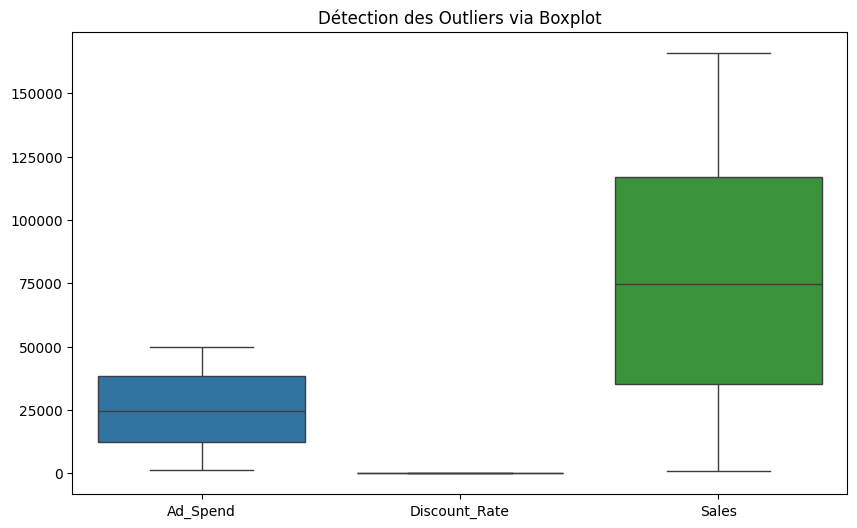

In [ ]:

# Détection of  outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Ad_Spend', 'Discount_Rate', 'Sales']])
plt.title("Détection des Outliers via Boxplot")
plt.show()

In [ ]:
df.head(20)

,Ad_Spend,Discount_Rate,Customer_Reviews,Competitor_Presence,Store_Location_Suburban,Store_Location_Urban,Seasonality_Low,Seasonality_Medium,Sales
0,16795,2.402946,2,0,True,False,False,False,51862.398887
1,1860,47.457287,4,1,True,False,False,True,1030.973249
2,39158,44.334019,2,1,False,False,True,False,117308.376546
3,45732,13.044681,2,0,False,True,False,False,143887.209346
4,12284,0.765227,1,0,False,True,False,True,40301.078588
5,7265,46.671815,1,0,False,False,False,True,11968.729482
6,17850,25.051994,4,0,False,True,False,True,44370.167975
7,38194,26.968872,3,1,False,True,False,False,121245.619425
8,22962,34.198188,2,0,True,False,True,False,72994.385175
9,48191,30.792558,4,0,False,False,False,True,146411.904476


In [ ]:
# divise the data in training data and test data
X = df.drop(columns=['Sales'])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# training of  modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Prédiction
y_pred = model.predict(X_test)

In [ ]:

# Évaluation of model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 23239951.479833275
R-squared: 0.9884392447948407


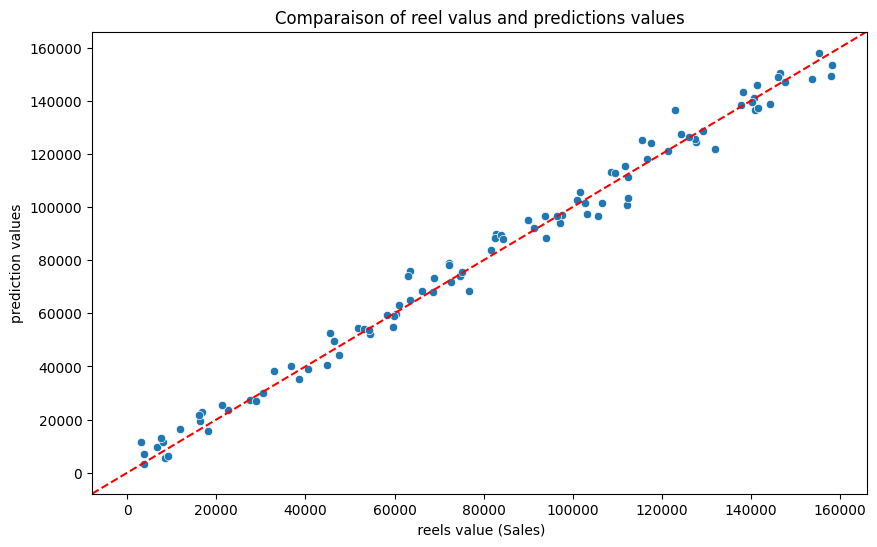

In [ ]:
# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel(" reels value (Sales)")
plt.ylabel("prediction values")
plt.title("Comparaison of reel valus and predictions values")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ligne  of prediction
plt.show()